In [31]:
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")


In [49]:
df # checking the first 5 and last 5 rows of our dataset


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Exploratory Data Analysis (EDA)

In [50]:
pd.set_option('display.max_columns', None)
#Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook

In [51]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Checking out all the column details that were truncated before and wow I see no text data present in any of the columns in our dataset.



In [52]:
print("We had {} Rows and {} Columns before dropping duplicates.".format(df.shape[0], df.shape[1]))
df.drop_duplicates(inplace=True)
print("We have {} Rows and {} Columns after dropping duplicates.".format(df.shape[0], df.shape[1]))

We had 8425 Rows and 23 Columns before dropping duplicates.
We have 6762 Rows and 23 Columns after dropping duplicates.


With the drop_duplicates option I was trying to get rid of all the duplicate values present in our dataset. However, we can see that there are no duplicate data present in our dataset.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   Evaporation    3841 non-null   float64
 6   Sunshine       3526 non-null   float64
 7   WindGustDir    5820 non-null   object 
 8   WindGustSpeed  5820 non-null   float64
 9   WindDir9am     5968 non-null   object 
 10  WindDir3pm     6468 non-null   object 
 11  WindSpeed9am   6699 non-null   float64
 12  WindSpeed3pm   6662 non-null   float64
 13  Humidity9am    6708 non-null   float64
 14  Humidity3pm    6666 non-null   float64
 15  Pressure9am    5454 non-null   float64
 16  Pressure3pm    5451 non-null   float64
 17  Cloud9am       4896 non-null   float64
 18  Cloud3pm

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,6692.0,13.109145,5.569574,-2.0,9.0,13.2,17.5,28.5
MaxTemp,6705.0,24.098345,6.156128,8.2,19.5,23.5,28.4,45.5
Rainfall,6624.0,2.780148,10.591418,0.0,0.0,0.0,0.8,371.0
Evaporation,3841.0,5.302395,4.436790,0.0,2.6,4.6,7.0,145.0
Sunshine,3526.0,7.890896,3.785883,0.0,5.4,9.0,10.8,13.9
WindGustSpeed,5820.0,38.977663,14.418577,7.0,30.0,37.0,48.0,107.0
WindSpeed9am,6699.0,12.782206,9.833499,0.0,6.0,11.0,19.0,63.0
WindSpeed3pm,6662.0,17.571150,9.620043,0.0,9.0,17.0,24.0,83.0
Humidity9am,6708.0,67.506559,17.251733,10.0,56.0,68.0,81.0,100.0
Humidity3pm,6666.0,50.467147,18.631086,6.0,38.0,50.0,63.0,99.0


Using the describe method to check the numerical data details. Almost all the columns in our dataset has numerical values in them and it looks like the count, mean, standard deviation, minimum value,

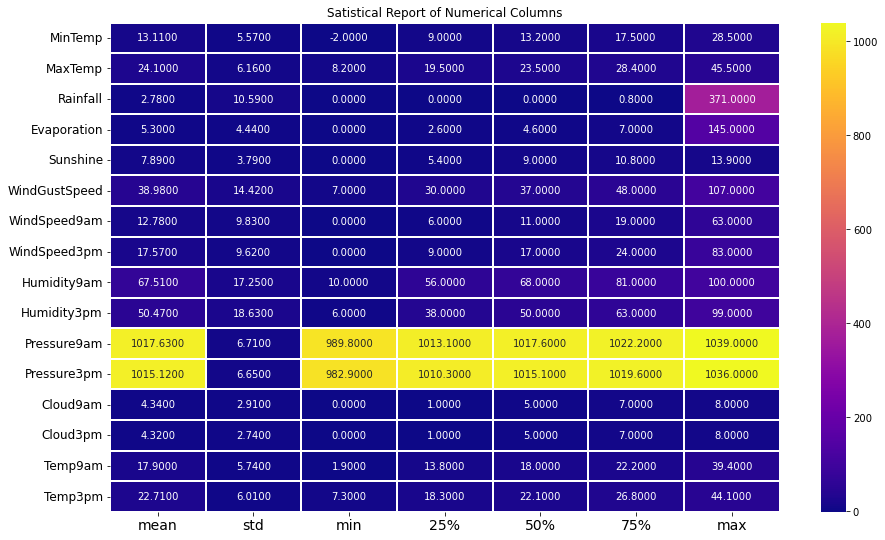

In [55]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (15,9))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f", cmap="plasma")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 12)
plt.show()

So the column that stands out the most in terms of values that are present in the column name Solar radiation. We can see that this particular column has numeric data higher than all the remaining columns present in our entire dataset.

# Data pre processing

In [56]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.drop('Date', axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


So I found this cool way to convert our latitude and longitude data present in our dataset and get the geographical location of it instead of seeing just coordinates and have imported the required dependencies here.

<AxesSubplot:>

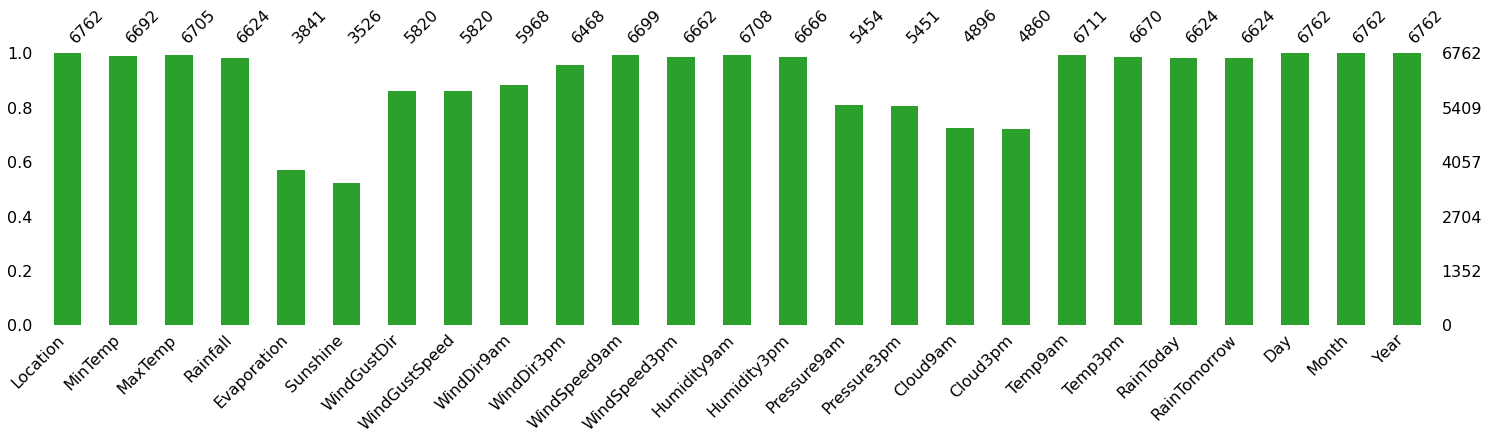

In [60]:
missingno.bar(df, figsize = (25,5), color="tab:green")


In [61]:
print("Missing values in percentage:\n")
for col in df:
    percentage = np.round((df[col].isnull().sum()/df.shape[0])*100, 3)
    print(col, ":".format(), percentage, '%')

Missing values in percentage:

Location : 0.0 %
MinTemp : 1.035 %
MaxTemp : 0.843 %
Rainfall : 2.041 %
Evaporation : 43.197 %
Sunshine : 47.856 %
WindGustDir : 13.931 %
WindGustSpeed : 13.931 %
WindDir9am : 11.742 %
WindDir3pm : 4.348 %
WindSpeed9am : 0.932 %
WindSpeed3pm : 1.479 %
Humidity9am : 0.799 %
Humidity3pm : 1.42 %
Pressure9am : 19.343 %
Pressure3pm : 19.388 %
Cloud9am : 27.595 %
Cloud3pm : 28.128 %
Temp9am : 0.754 %
Temp3pm : 1.361 %
RainToday : 2.041 %
RainTomorrow : 2.041 %
Day : 0.0 %
Month : 0.0 %
Year : 0.0 %


In [62]:
print("We had {} Rows and {} Columns before dropping null values.".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(df.shape[0], df.shape[1]))

We had 6762 Rows and 25 Columns before dropping null values.
We have 3137 Rows and 25 Columns after dropping null values.


So we have removed all the missing values and by checking the difference between the row value before and after dropping null values we get a dataset where we would have afforded on losing those information instead of filling them manually.



In [63]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

Awesome we now have a dataframe that does not have any missing data in it.

